In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [4]:
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

df_actual_predicted = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_actual_predicted.head()

,y_test,y_pred
204,1,1
70,0,0
131,0,0
431,1,1
540,1,1


In [6]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy Score: 0.9649122807017544
Confusion Matrix: [[40  3]
 [ 1 70]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [7]:
importances = rf.feature_importances_
feature_names = X.columns

for feature, importance in zip(feature_names, importances):
    print(f"Feature : {feature}, Importance : {importance : 0.4f}")

Feature : mean radius, Importance :  0.0487
Feature : mean texture, Importance :  0.0136
Feature : mean perimeter, Importance :  0.0533
Feature : mean area, Importance :  0.0476
Feature : mean smoothness, Importance :  0.0073
Feature : mean compactness, Importance :  0.0139
Feature : mean concavity, Importance :  0.0680
Feature : mean concave points, Importance :  0.1062
Feature : mean symmetry, Importance :  0.0038
Feature : mean fractal dimension, Importance :  0.0039
Feature : radius error, Importance :  0.0201
Feature : texture error, Importance :  0.0047
Feature : perimeter error, Importance :  0.0113
Feature : area error, Importance :  0.0224
Feature : smoothness error, Importance :  0.0043
Feature : compactness error, Importance :  0.0053
Feature : concavity error, Importance :  0.0094
Feature : concave points error, Importance :  0.0035
Feature : symmetry error, Importance :  0.0040
Feature : fractal dimension error, Importance :  0.0053
Feature : worst radius, Importance :  0.

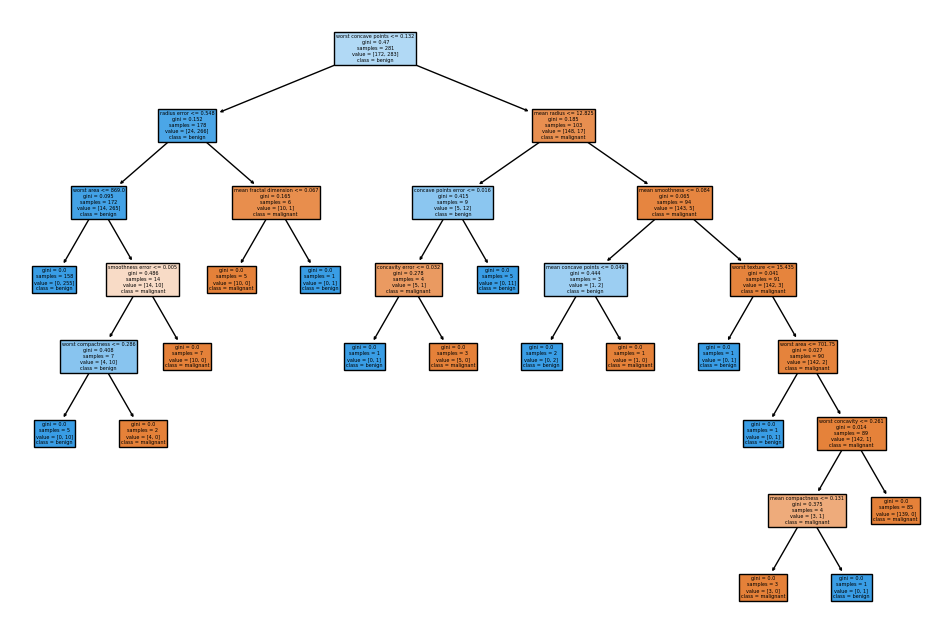

In [12]:
# visualizing a single tree

plt.figure(figsize = (12, 8))
plot_tree(rf.estimators_[0], feature_names = feature_names, class_names = cancer.target_names, filled = True)
plt.show()

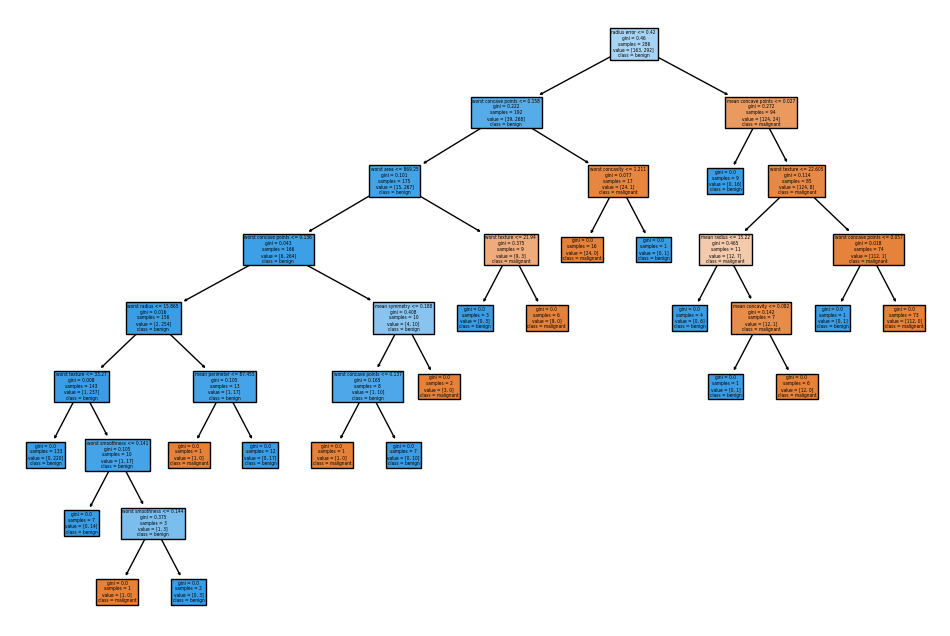

In [13]:
plt.figure(figsize = (12, 8))
plot_tree(rf.estimators_[1], feature_names = feature_names, class_names = cancer.target_names, filled = True)
plt.show()